In [20]:
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [21]:
encoder = OneHotEncoder()     #LabelEncoder encode labels with value between 0 and n_classes-1
encoder.fit([[0],[1]])   

OneHotEncoder()

In [22]:
input_path = []
label = []

In [23]:
data = []
paths = []
result = []
for r,d,f in os.walk(r"/content/drive/MyDrive/DATA SET FOR MP/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("Tumor","Tumor",path))
        result.append(encoder.transform([[0]]).toarray())

In [24]:
paths = []
for r,d,f in os.walk(r"/content/drive/MyDrive/DATA SET FOR MP/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("No Tumor","No Tumor",path))
        result.append(encoder.transform([[1]]).toarray())

In [25]:
len(input_path)

139

In [26]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/drive/MyDrive/DATA SET FOR MP/yes/Y34...,0
1,/content/drive/MyDrive/DATA SET FOR MP/yes/Y21...,0
2,/content/drive/MyDrive/DATA SET FOR MP/yes/Y69...,0
3,/content/drive/MyDrive/DATA SET FOR MP/no/No20...,1
4,/content/drive/MyDrive/DATA SET FOR MP/no/29 n...,1


In [27]:
pd.unique(df['label'])




array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


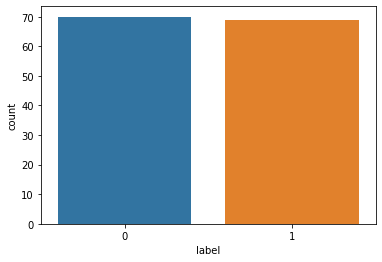

In [28]:
import seaborn as sns
sns.countplot(df['label'])

In [29]:
print(np.array(result))

[[[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[1. 0.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0. 1.]]

 [[0

In [30]:
result = np.array(result)
result = result.reshape(139,2)

In [31]:
result.shape

(139, 2)

In [32]:
data = np.array(data)
#data = data.reshape(139, 128, 128, 3)
data.shape

(139, 224, 224, 3)

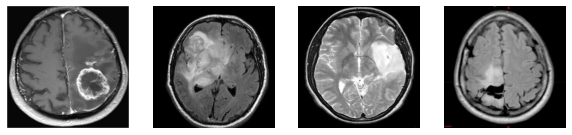

In [33]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()

In [34]:
x_train , x_test , y_train , y_test = train_test_split(data , result , test_size = 0.25 , shuffle = True , random_state = 1)

In [35]:
print("Shape of an image in x_train : ",x_train[0].shape)
print("Shape of an image in x_test : ",x_test[0].shape)

Shape of an image in x_train :  (224, 224, 3)
Shape of an image in x_test :  (224, 224, 3)


In [36]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [37]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (104, 224, 224, 3)
x_test Shape :  (35, 224, 224, 3)
y_train Shape:  (104, 2)
y_test Shape:  (35, 2)


In [38]:
modelVGG = VGG16(include_top = False,weights = 'imagenet',classifier_activation = 'softmax',input_shape = (224, 224, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [39]:
for layer in modelVGG.layers:
    layer.trainable = False

In [40]:
num_classes = 2
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
        top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(2,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [41]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [42]:
num_classes = 2
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [43]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(x_train , y_train , epochs = 15 , validation_data = (x_test , y_test), verbose = 1 , initial_epoch = 0)

Epoch 1/15
4/4 [==============================] - 65s 16s/step - loss: 10.5612 - accuracy: 0.5096 - val_loss: 2.4936 - val_accuracy: 0.6286
Epoch 2/15
4/4 [==============================] - 65s 17s/step - loss: 2.6661 - accuracy: 0.4904 - val_loss: 2.2559 - val_accuracy: 0.3714
Epoch 3/15
4/4 [==============================] - 63s 16s/step - loss: 1.0643 - accuracy: 0.6154 - val_loss: 0.6030 - val_accuracy: 0.6571
Epoch 4/15
4/4 [==============================] - 61s 16s/step - loss: 0.7173 - accuracy: 0.6346 - val_loss: 0.7570 - val_accuracy: 0.6000
Epoch 5/15
4/4 [==============================] - 63s 16s/step - loss: 0.5106 - accuracy: 0.7885 - val_loss: 0.6568 - val_accuracy: 0.6286
Epoch 6/15
4/4 [==============================] - 61s 16s/step - loss: 0.2527 - accuracy: 0.9231 - val_loss: 0.3462 - val_accuracy: 0.8571
Epoch 7/15
4/4 [==============================] - 61s 16s/step - loss: 0.2271 - accuracy: 0.9423 - val_loss: 0.4827 - val_accuracy: 0.6857
Epoch 8/15
4/4 [==========

In [45]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

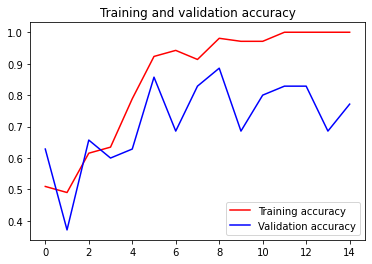

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [47]:
def names(number):
    if number==0:
        return "It's a TUMOR"
    else:
        return "It's NOT a Tumor"

99.99191761016846% Confidence It's NOT a Tumor


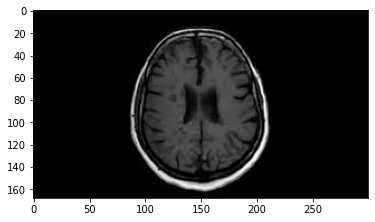

In [50]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/DATA SET FOR MP/no/11 no.jpg")
x = np.array(img.resize((224,224)))
x = x.reshape(1,224,224,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))